#### Evaluation Project - 8

# Rainfall Prediction - Weather Forecasting

                                                                

**Problem Statement:**

                                    **Rain Prediction –Weather forecasting**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.           

Here, predict two things:
 
### Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast **whether or not it will rain tomorrow.**

b)  Design a predictive model with the use of machine learning algorithms to **predict how much rainfall could be there.**


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset and checking shape
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
print("rows:",df.shape[0],"          columns:",df.shape[1])
pd.set_option("display.max_columns",None)
df.head(10)

rows: 8425           columns: 23


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
# checking duplicate rows
print("Nunmber of duplicate rows:",df.duplicated().sum())

Nunmber of duplicate rows: 1663


In [4]:
# removing duplicate rows
df.drop_duplicates(inplace=True)
print("Nunmber of duplicate rows:",df.duplicated().sum())

Nunmber of duplicate rows: 0


- duplicate rows are removed

In [5]:
# checking ' ','NA','-','?'
df.isin([' ','NA','-','?']).sum().any()

False

- Unwanted symbols are not present

In [6]:
# checking null value
df.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

- Except Date and Location all columns has null values 


**To fill null values let's explore columns** 

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

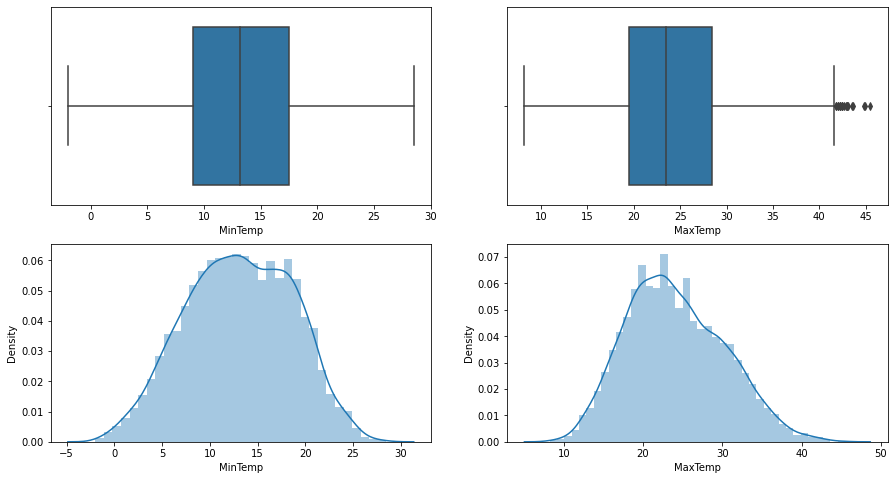

In [7]:
# checking data in MinTemp and MaxTemp
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df['MinTemp'])
plt.subplot(2,2,2)
sns.boxplot(df['MaxTemp'])
plt.subplot(2,2,3)
sns.distplot(df['MinTemp'])
plt.subplot(2,2,4)
sns.distplot(df['MaxTemp'])

- data distrobution is normal in both the columns 
- MaxTemp has outliers and because of that i'll meadian to fill null values

In [8]:
# fill null values in mintemp and maxtemp
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].median())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].median()) 

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 6762, dtype: float64>

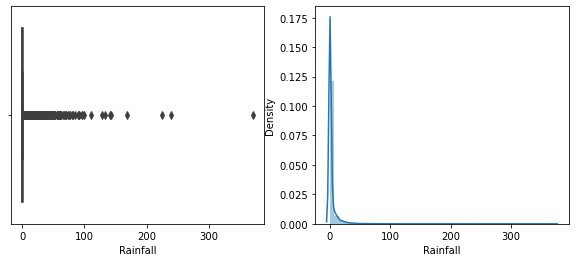

In [9]:
# checking data in Rainfall 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df['Rainfall'])
plt.subplot(1,2,2)
sns.distplot(df['Rainfall'])
df.Rainfall.max

- data is skewed right in this column and this column has many outliers
- so i'll fill null vlues with mode which is 0.0

In [10]:
# filling null values in rainfall
df['Rainfall'] = df['Rainfall'].fillna(0.0)

- "Cloud9am", "Cloud3pm", "Evaporation", "Sunshine" these column has very large number of outliers
- so, i'll fill random values in these columns

In [11]:
# creating function to fill null values
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [12]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.2,3.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,9.9,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.0,5.8,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,2.8,10.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,2.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,1.2,9.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,7.6,9.9,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,9.4,12.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,5.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,2.4,6.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,6.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [13]:
# let's check wind speed and direction
wind_dir = ['WindGustDir', 'WindDir9am', 'WindDir3pm',]
wind_spe = ['WindGustSpeed','WindSpeed9am', 'WindSpeed3pm']

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

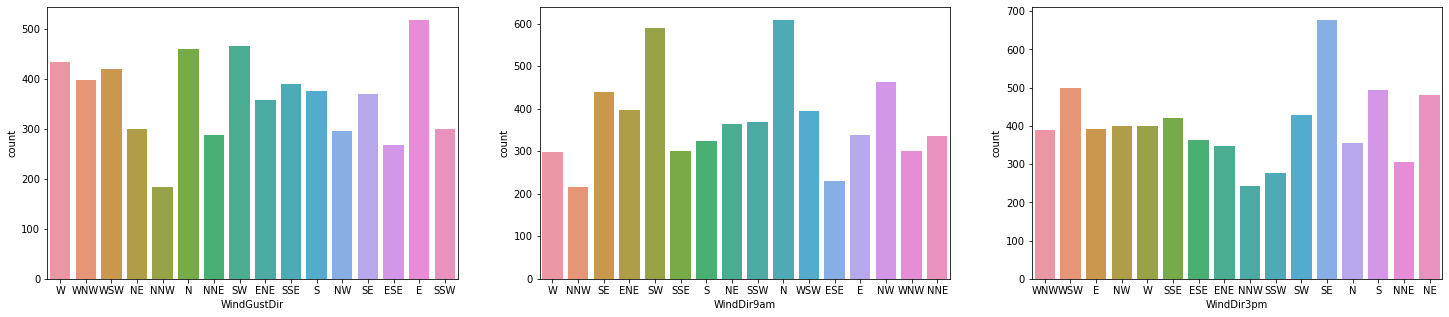

In [14]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.countplot(df['WindGustDir'])
plt.subplot(1,3,2)
sns.countplot(df['WindDir9am'])
plt.subplot(1,3,3)
sns.countplot(df['WindDir3pm'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

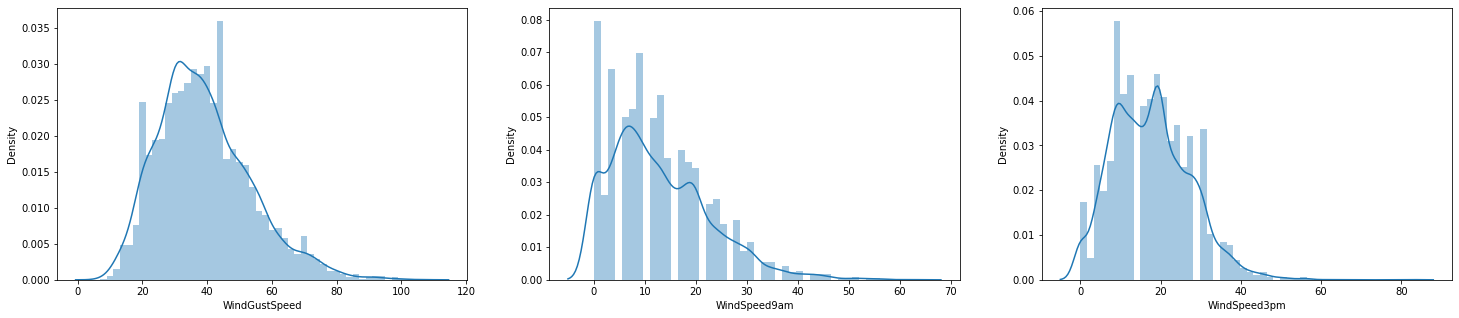

In [15]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.distplot(df['WindGustSpeed'])
plt.subplot(1,3,2)
sns.distplot(df['WindSpeed9am'])
plt.subplot(1,3,3)
sns.distplot(df['WindSpeed3pm'])

- as direction is object so i'll use mode and for wind speed i'll use median

In [16]:
# fill nulls in winddir
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)  

In [17]:
for i in wind_dir:
    mode_nan(df,i)

In [18]:
# filling null in wind speed
for i in wind_spe:
    if(df[i].isnull().sum()*100/len(df))>0:
        df[i] = df[i].fillna(df[i].median())

- let's check humidity and pressure

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

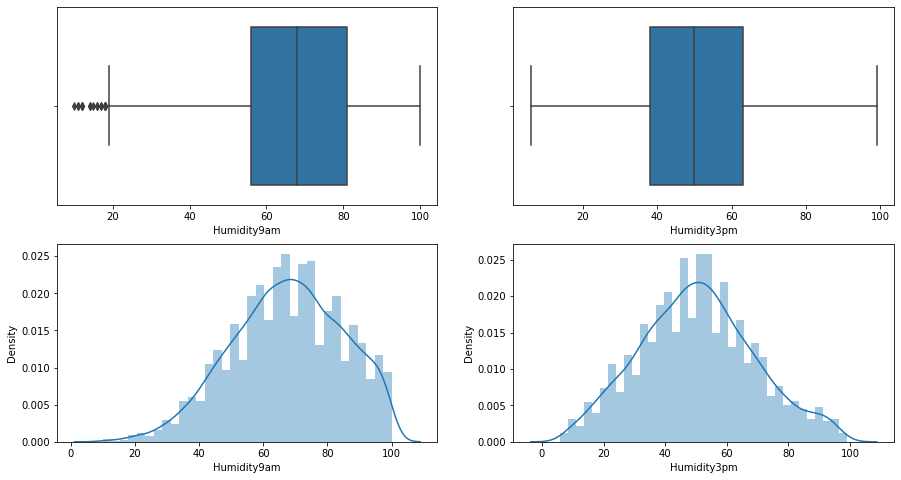

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df['Humidity9am'])
plt.subplot(2,2,2)
sns.boxplot(df['Humidity3pm'])
plt.subplot(2,2,3)
sns.distplot(df['Humidity9am'])
plt.subplot(2,2,4)
sns.distplot(df['Humidity3pm'])

In [20]:
# filling humidity9am with median and 3am with mean
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].median())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

- checking pressure

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

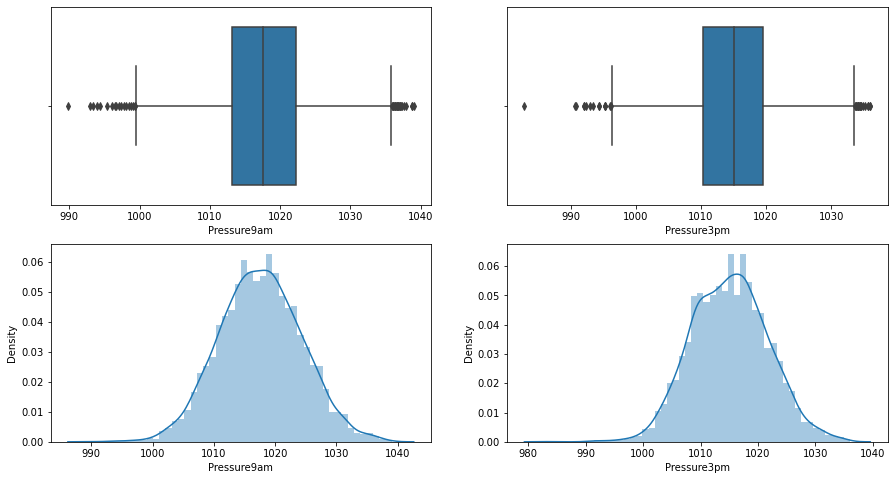

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df['Pressure9am'])
plt.subplot(2,2,2)
sns.boxplot(df['Pressure3pm'])
plt.subplot(2,2,3)
sns.distplot(df['Pressure9am'])
plt.subplot(2,2,4)
sns.distplot(df['Pressure3pm'])

- both the columns contain outliers so i'll use median to fill null values

In [22]:
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].median())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].median())

- exploring temperature

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

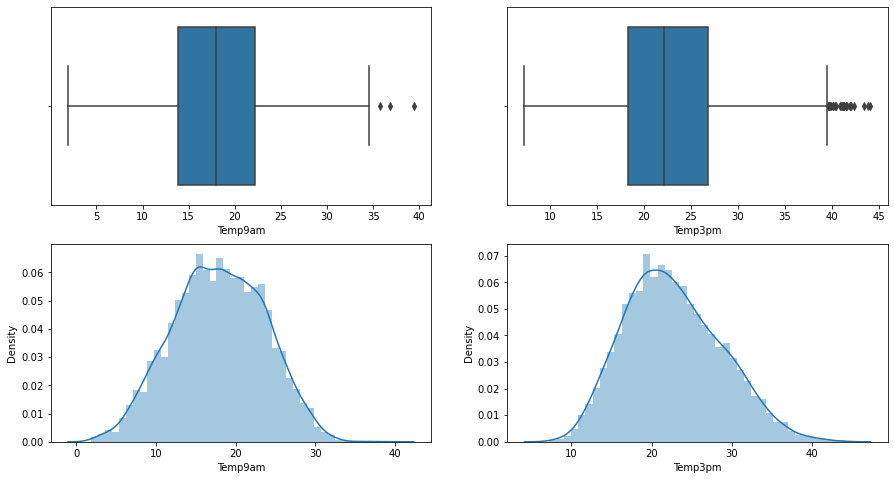

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(df['Temp9am'])
plt.subplot(2,2,2)
sns.boxplot(df['Temp3pm'])
plt.subplot(2,2,3)
sns.distplot(df['Temp9am'])
plt.subplot(2,2,4)
sns.distplot(df['Temp3pm'])

- it also has outliers so i'll again use median

In [24]:
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].median())

- cheking data in today and tomorrow rain


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

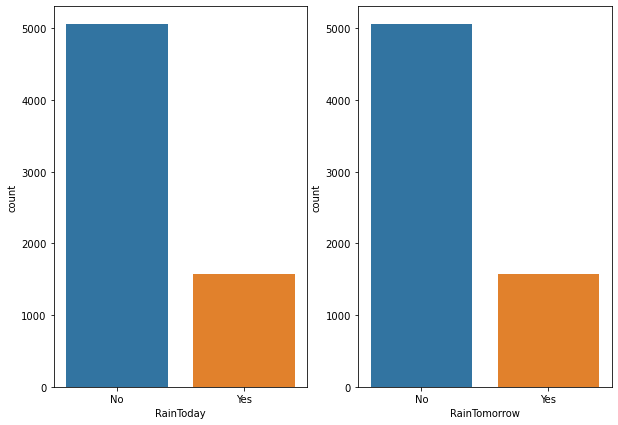

In [25]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.countplot(df['RainToday'])
plt.subplot(1,2,2)
sns.countplot(df['RainTomorrow'])

- as they are categorical columns so i'll use mode

In [26]:
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [27]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- **All null values are filled**
Now,  we can move on to next step

In [28]:
# checking stats of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6762.0,13.110086,5.540674,-2.0,9.0,13.2,17.4,28.5
MaxTemp,6762.0,24.093301,6.130367,8.2,19.6,23.5,28.4,45.5
Rainfall,6762.0,2.723410,10.490138,0.0,0.0,0.0,0.8,371.0
Evaporation,6762.0,5.284561,4.500156,0.0,2.6,4.6,7.0,145.0
Sunshine,6762.0,7.878009,3.800413,0.0,5.3,9.0,10.8,13.9
WindGustSpeed,6762.0,38.702159,13.393977,7.0,30.0,37.0,46.0,107.0
WindSpeed9am,6762.0,12.765602,9.789075,0.0,6.0,11.0,19.0,63.0
WindSpeed3pm,6762.0,17.562703,9.548883,0.0,11.0,17.0,24.0,83.0
Humidity9am,6762.0,67.510500,17.182756,10.0,56.0,68.0,80.0,100.0
Humidity3pm,6762.0,50.467147,18.498341,6.0,38.0,50.0,62.0,99.0


- data is not normally distributed in rainfall, evaporation, windspeed, humidity as maximum values in these columns is much higher as compared to quantile range

In [29]:
# checking stats of object column
df.describe(include=['O'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,6762,6762,6762,6762,6762,6762,6762
unique,3004,12,16,16,16,2,2
top,2011-02-11,PerthAirport,E,N,SE,No,No
freq,4,1204,1460,1403,971,5190,5190


**converting object data into numerical**

In [30]:
# # Using Label Encoder on ibject data
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lab.fit_transform(df[i])

<AxesSubplot:>

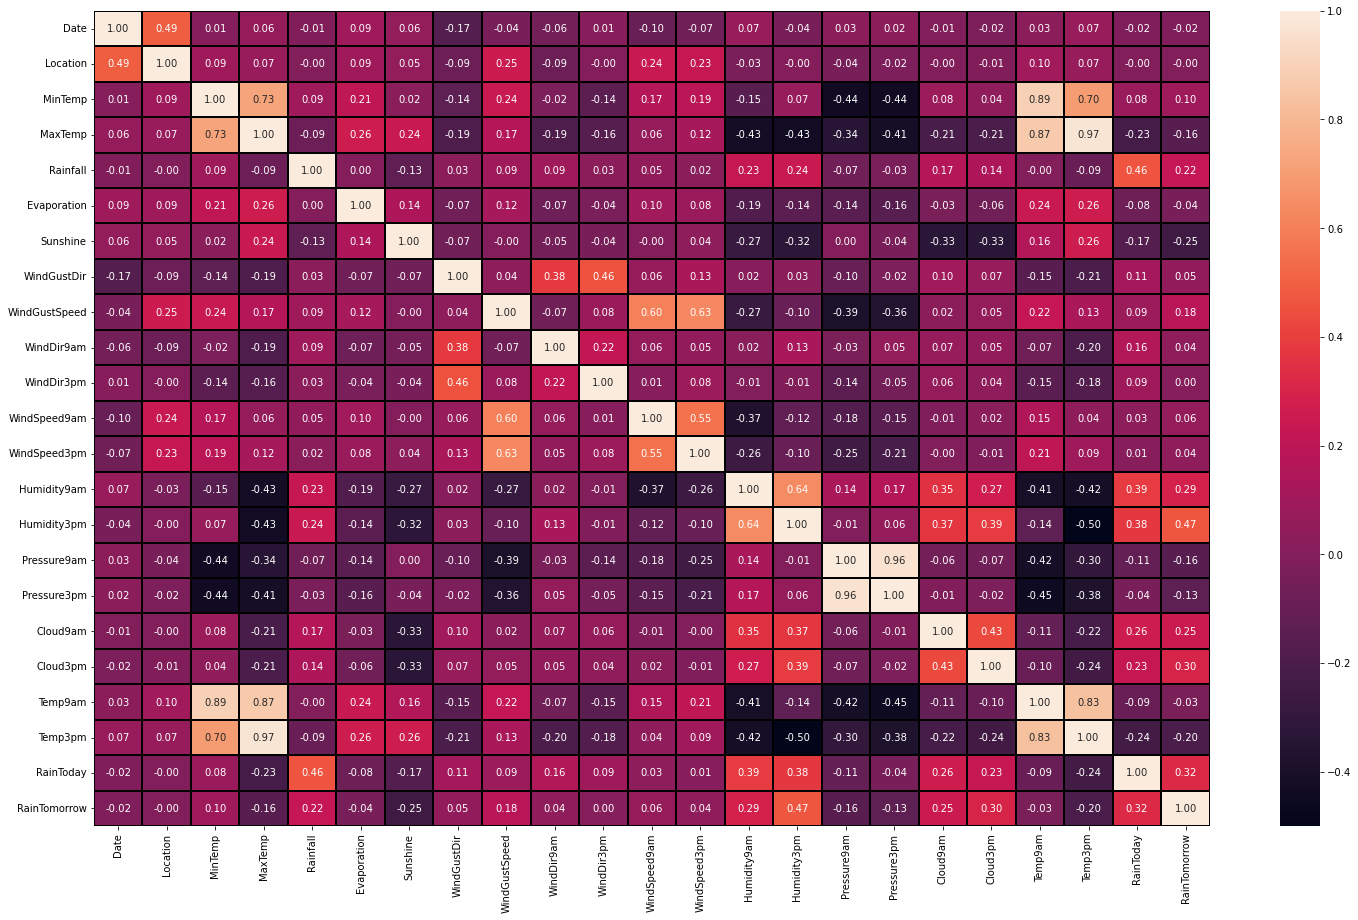

In [31]:
# checking correlation 
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- correlation with target variable
1. mintemp is correlated with label
2. maxtemp is correlated with label
3. rainfall is correlated with label
4. subshine is correlated with label
5. windgustspeed is correlated with label
6. windspeed9am is correlated with label
7. humidity9am is correlated with label
8. humidity3pm is correlated with label
10. pressure9am is correlated with label
11. pressure3pm is correlated with label
12. cloud9am is correlated with label
13. cloud3pm is correlated with label
14. temp9am is correlated with label
15. remp3pm is correlated with label
16. rain today is correlated with label

- multicollinearity
1. mintemp is correlated with temp9am and with temp3pm
2. maxtemp is correlated with temp9am and with temp3pm
3. maxtemp and mintemp are correlated
4. temp9am and temp3pm are correlated
5. pressure9am and pressure3pm are correlated
**i selecte temp3pm, Pressure9am and maxtemp to remove multicolinearity**

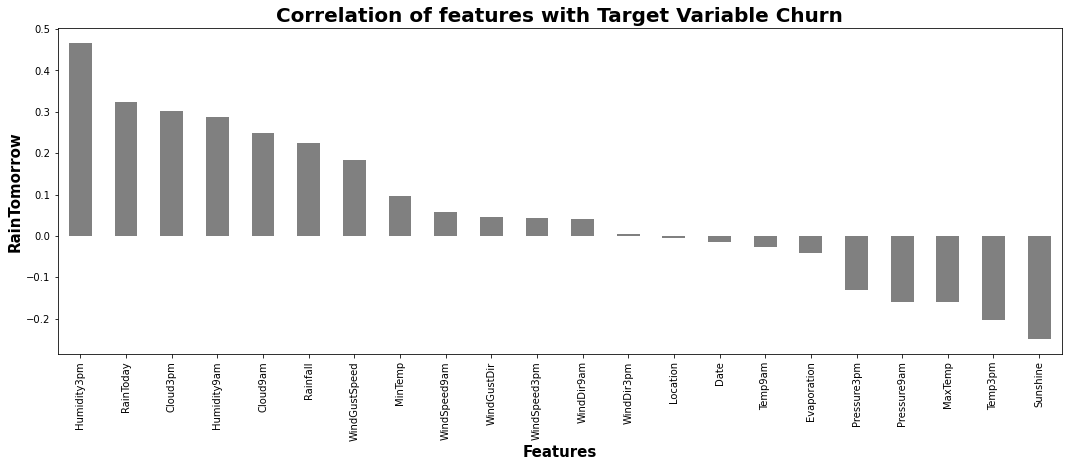

In [32]:
plt.figure(figsize = (18,6))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'grey')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('RainTomorrow',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

In [33]:
# droping unnecessary columns
df1 = df.drop(columns=['Date', 'Location','MinTemp','Evaporation', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
                       'WindSpeed3pm','Pressure3pm','Temp9am' ],axis=1)

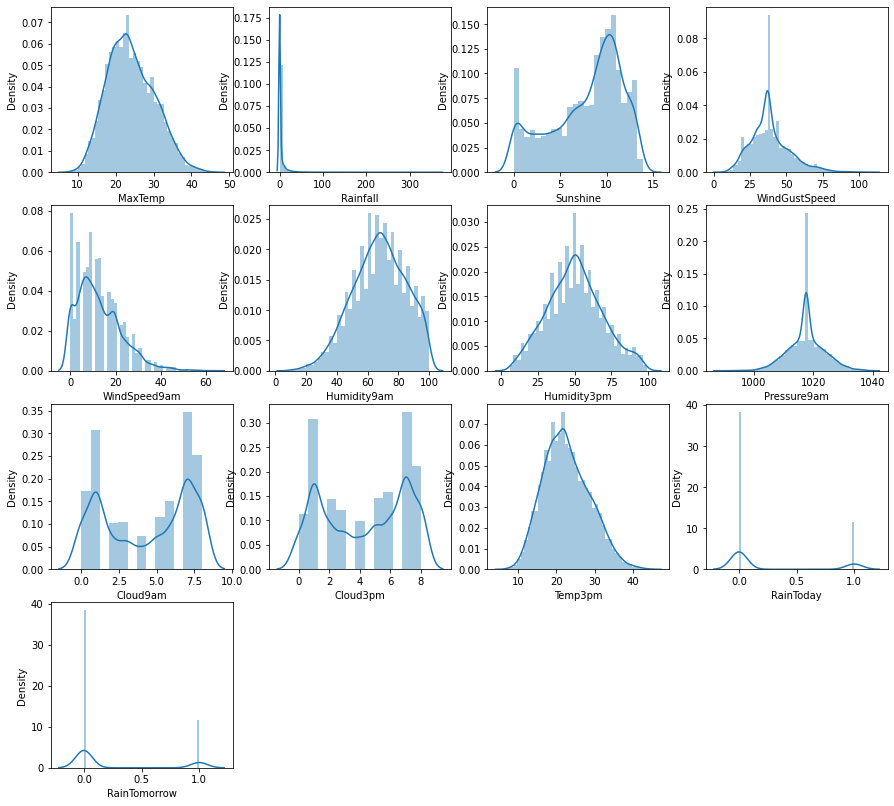

In [34]:
# checking skewness in data
# checking distribution in continous columns
plt.figure(figsize=(15,14))
plot = 1
for column in df1:
    if plot<=13:
        ax = plt.subplot(4,4,plot)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plot+=1
plt.show()

- data is highlt skewed in rainfall and some other columns are also skewed but less

In [35]:
# removing skewness
from sklearn.preprocessing import PowerTransformer
skewed = ['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Temp3pm']
scaler = PowerTransformer(method='yeo-johnson')
df1[skewed] = scaler.fit_transform(df1[skewed].values)

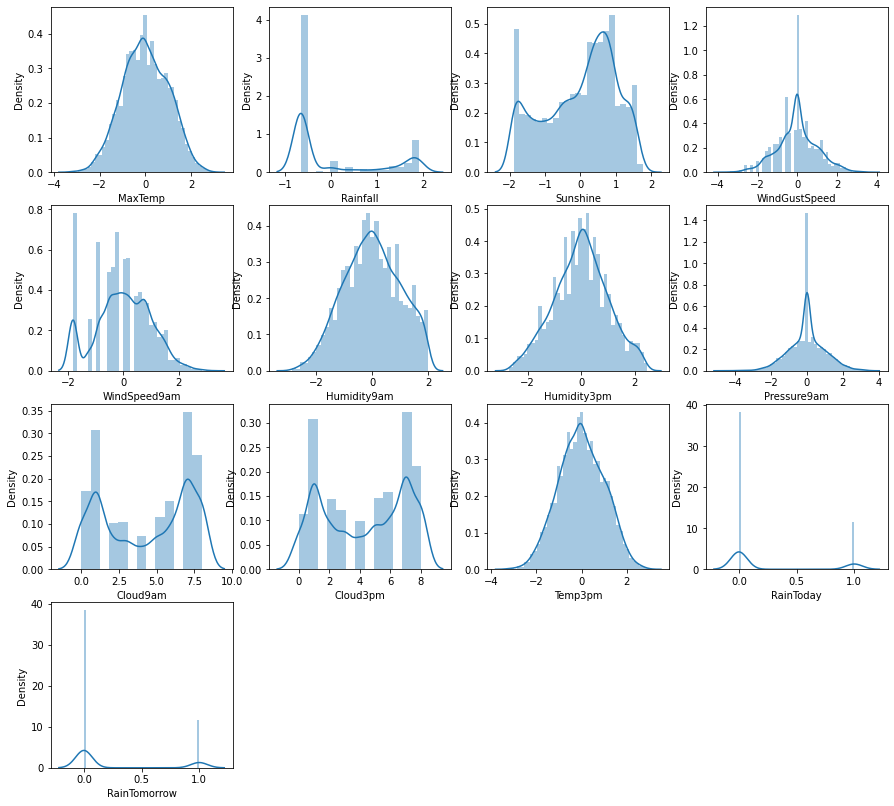

In [36]:
plt.figure(figsize=(15,14))
plot = 1
for column in df1:
    if plot<=13:
        ax = plt.subplot(4,4,plot)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plot+=1
plt.show()

- skewness is removed

In [37]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

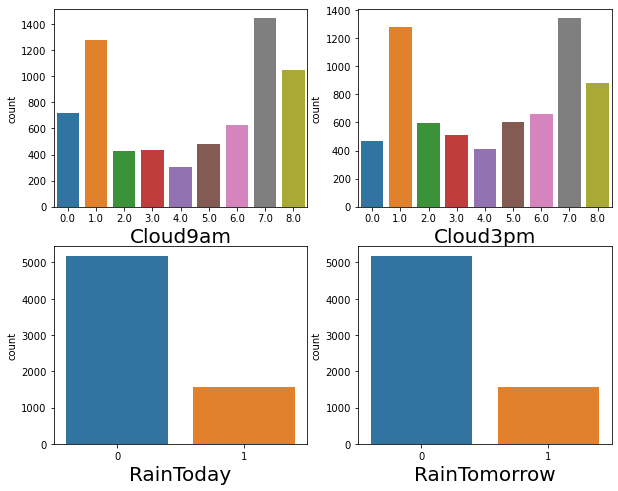

In [38]:
# checking data in categorical columns
d = ['Cloud9am', 'Cloud3pm','RainToday', 'RainTomorrow']
plt.figure(figsize=(10,8))
plot = 1
for column in df1[d]:
    if plot<=4:
        ax = plt.subplot(2,2,plot)
        sns.countplot(x=column,data=df1)
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

- data in raintoday and rain tomorrow is imbalanced

**lets' check and remove outliers**

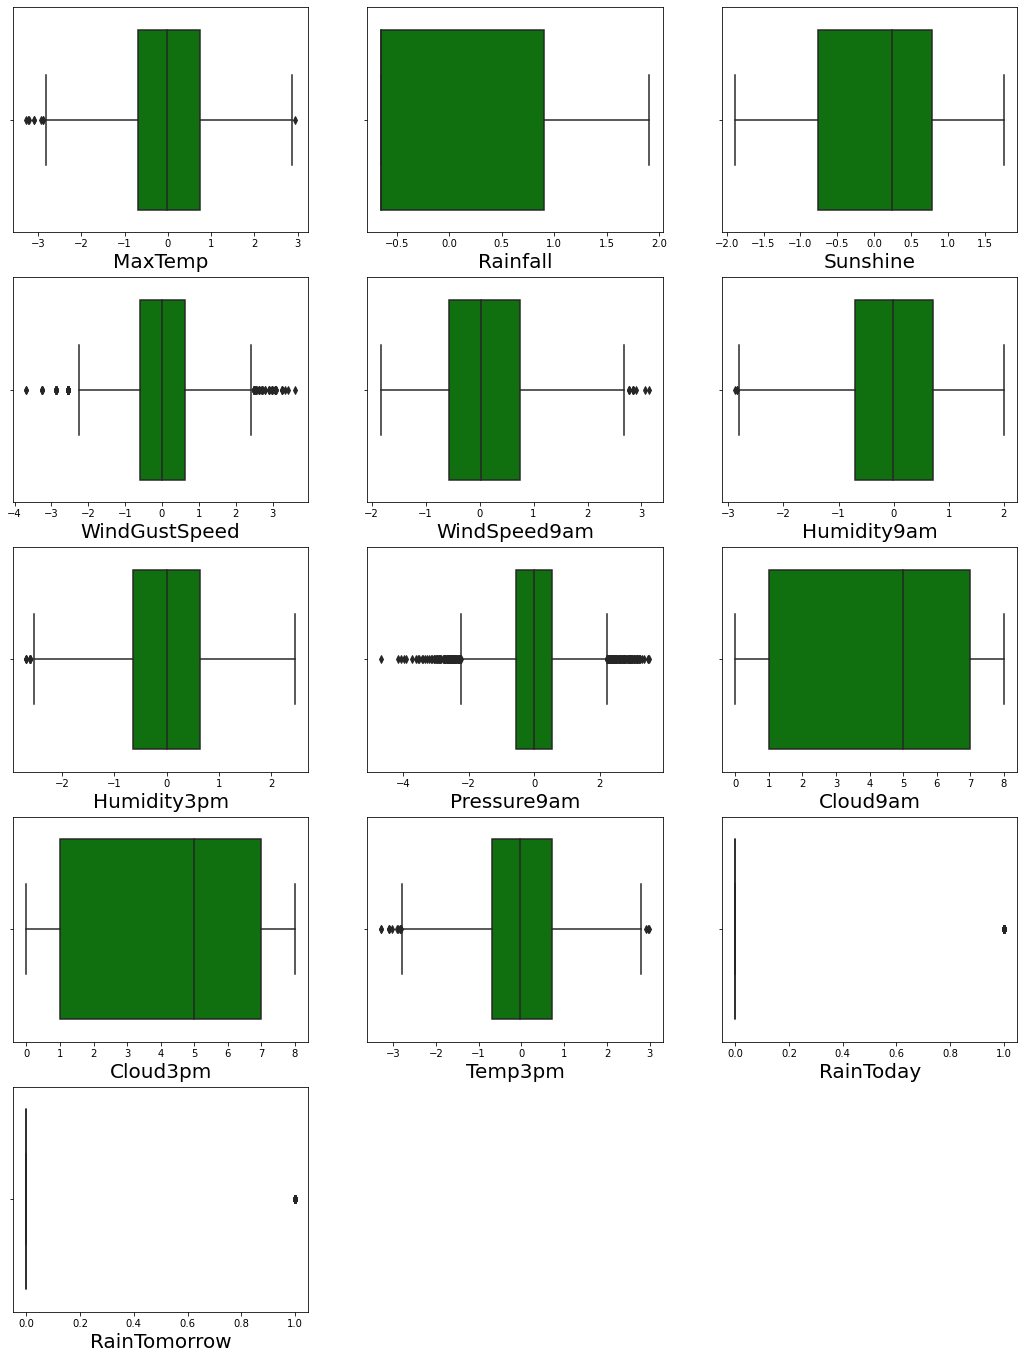

In [39]:
# checking outliers
plt.figure(figsize=(18,24))
plot = 1
for column in df1:
    if plot<=13:
        ax = plt.subplot(5,3,plot)
        sns.boxplot(x=column,data=df1,color='green')
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()

- multiple rows have outliers

**REMOVING OUTLIERS**

In [40]:
# removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df1))
threshold = 2.5
df_n = df1[(z<2.5).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df_n.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df_n.shape[0])/df1.shape[0]*100)

dfs=df_n.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (6762, 13)
Shape of the dataframe after removing outliers:  (6404, 13)
Percentage of data loss post outlier removal:  5.294291629695357


In [41]:
df1 = dfs

- all possible outliers are removed

**Balanceing the data**

In [42]:
## Balancing using SMOTE
from imblearn.over_sampling import SMOTE

# Splitting data in target and dependent feature
X = df1.drop(['RainTomorrow'], axis =1)
Y = df1['RainTomorrow']

In [43]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [44]:
# scaling the data
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### model building

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

**Finding best ranfom state**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7846776915288559 on Random_state 155


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=155, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7846776915288559


Confusion matrix of Logistics Regression : 
 [[1193  302]
 [ 336 1132]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1495
           1       0.79      0.77      0.78      1468

    accuracy                           0.78      2963
   macro avg       0.78      0.78      0.78      2963
weighted avg       0.78      0.78      0.78      2963



- Finding Optimal value of n_neighbors for KNN

In [48]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3519388465885846
RMSE value for k=  2 is: 0.3637283962940914
RMSE value for k=  3 is: 0.38884201164949334
RMSE value for k=  4 is: 0.3940153035089595
RMSE value for k=  5 is: 0.4165006981862157
RMSE value for k=  6 is: 0.4066607097302855
RMSE value for k=  7 is: 0.4221347800499781
RMSE value for k=  8 is: 0.4193272016680104
RMSE value for k=  9 is: 0.4296628822374529
RMSE value for k=  10 is: 0.4265093505682771
RMSE value for k=  11 is: 0.4370613369051846
RMSE value for k=  12 is: 0.427299915381198
RMSE value for k=  13 is: 0.43551421227341863
RMSE value for k=  14 is: 0.4393718094110769
RMSE value for k=  15 is: 0.4447162329434377
RMSE value for k=  16 is: 0.4462314544814304
RMSE value for k=  17 is: 0.45149468646580015
RMSE value for k=  18 is: 0.44849468854873775
RMSE value for k=  19 is: 0.45521688206818356
RMSE value for k=  20 is: 0.45074655888231213


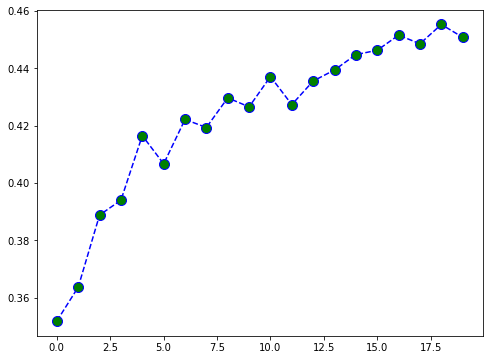

In [49]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

- At k=2, we get the minimum RMSE value which approximately 0.34516084772155864, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

#### applying different algorithm

In [50]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 16),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7846776915288559


Confusion matrix : 
 [[1193  302]
 [ 336 1132]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1495
           1       0.79      0.77      0.78      1468

    accuracy                           0.78      2963
   macro avg       0.78      0.78      0.78      2963
weighted avg       0.78      0.78      0.78      2963



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8113398582517719


Confusion matrix : 
 [[1198  297]
 [ 262 1206]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1495
           1       0.80      0.82      0.81      1468

    accuracy                           0.81      2963
   macro avg       0.81      0.81      0.81      2963
weighted avg       0.81      0.81      0

### cross validation

In [51]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76253165 0.68911392 0.68962025 0.79898734 0.80749747]
Mean Score : 0.7495501263257794
Std deviation : 0.05140929226333111




Cross Validation Score SVC() :

Score : [0.77316456 0.66936709 0.71392405 0.80556962 0.81509625]
Mean Score : 0.7554243135444321
Std deviation : 0.055710189298700266




Cross Validation Score GaussianNB() :

Score : [0.73822785 0.70734177 0.66582278 0.74734177 0.76798379]
Mean Score : 0.7253435932951151
Std deviation : 0.03559466930331146




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70177215 0.63341772 0.77063291 0.80151899 0.83232016]
Mean Score : 0.7479323868518589
Std deviation : 0.0717669980510371




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.74379747 0.6643038  0.7235443  0.80405063 0.81965552]
Mean Score : 0.7510703448629654
Std deviation : 0.05630248454748818




Cross Validation Score RandomForestClassifier() :

Score : [0.81620253 0.67746835

### Hyper parameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[5, 10, 15 ],
       'criterion':['entropy','gini'],
       'max_depth':[5,10,20],
       'min_samples_split':[5,7,10],
       'min_samples_leaf':[4,5,6]}

GCV = GridSearchCV(ExtraTreesClassifier(),param)
GCV.fit(X_train,Y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 15}

In [59]:
Final_mod = ExtraTreesClassifier(criterion='entropy', max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=25)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8923388457644279


- i don't give wide range or parameter that us why it is showing less accuracy 

###  Final model

In [54]:
Final_mod = ExtraTreesClassifier()
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.90988862639217


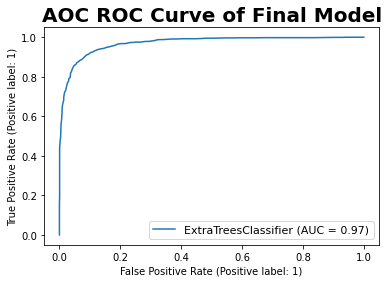

Auc Score :
 0.9100010935634676


In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [56]:
## Saving model
import joblib
joblib.dump(Final_mod,'tomorrow rain')

['tomorrow rain']

In [57]:
# Prediction
prediction = Final_mod.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(10)

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


###  let's work on Rainfall

In [61]:
df1

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow
0,-0.124731,0.697862,-1.129340,0.498309,0.828226,0.168818,-1.592255,-1.651214,8.0,7.0,-0.077944,0,0
1,0.233445,-0.654104,0.507451,0.498309,-0.866354,-1.350984,-1.407568,-1.165980,4.0,1.0,0.335442,0,0
2,0.328040,-0.654104,-0.636256,0.634082,0.750887,-1.657791,-1.108399,-1.667971,8.0,2.0,0.156627,0,0
3,0.679581,-0.654104,0.567041,-1.172832,0.035349,-1.298618,-1.976363,-0.000518,0.0,2.0,0.679944,0,0
4,1.295452,1.060659,0.389238,0.286504,-0.426475,0.842690,-0.933341,-1.132567,7.0,8.0,1.153501,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-0.041688,-0.654104,0.507451,-0.506787,0.234235,-0.977525,-1.468658,1.156843,7.0,4.0,0.023586,0,0
8421,0.265117,-0.654104,1.179749,-1.386854,0.234235,-0.701402,-1.654809,0.975504,1.0,5.0,0.367464,0,0
8422,0.513569,-0.654104,-0.399094,-0.013036,-0.182760,-0.867975,-1.468658,0.562633,8.0,6.0,0.618534,0,0
8423,0.528817,-0.654104,-1.881362,-0.778329,0.234235,-0.977525,-1.468658,0.297858,3.0,2.0,0.603099,0,0


In [62]:
# separating feature and label and scaling the data
x = df1.drop(columns=['Rainfall'])
y = df1.Rainfall

In [63]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Model Building

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

###  checking best random state

In [65]:
# checking best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9084486736099237 on Random_state 28


### applying different models

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=28, test_size=.33)
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.20594358740595614
Mean squared error : 0.10466433497043244
Root Mean Squared Error: 0.32351867793132505


 R2 Score :
0.9023691836688537


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.2005639593652176
Mean squared error : 0.0981469292513799
Root Mean Squared Error: 0.3132841030939487


 R2 Score :
0.9084486150328626


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.22665531417988363
Mean squared error : 0.2179163565849962
Root Mean Squared Error: 0.4668151203474414


 R2 Score :
0.7967277794168126


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.2762438718398966
Mean squared error : 0.11860530766610064
Root Mean Squared Error: 0.3443912131081463


 R2 Score :
0.8893650543719656


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.1945106890207872
Mean squared error : 0.09874669181312512
Root Mean Squared Error: 0.3142398635009968


 R2 Score :
0.907889156946929

In [71]:
# Cross Validation
model = [lin_reg,rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, x_scaled, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : LinearRegression() :

Mean CV Score : 0.8906025397966093


Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8823858881371776


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.8906025335864923


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.7518454022821592


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.8740685024857984


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8915379083999552


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max

#### Hyper parameter tuning

- as lasso is giving best accuracy so i'll tune it

In [72]:
from sklearn.model_selection import GridSearchCV

In [79]:
ridge_params = {'alpha':list(range(1000))}
las = GridSearchCV(Lasso(),ridge_params,verbose=5)
las.fit(x_train,y_train)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END ...........................alpha=0;, score=0.880 total time=   0.1s
[CV 2/5] END ...........................alpha=0;, score=0.854 total time=   0.0s
[CV 3/5] END ...........................alpha=0;, score=0.889 total time=   0.0s
[CV 4/5] END ...........................alpha=0;, score=0.882 total time=   0.0s
[CV 5/5] END ...........................alpha=0;, score=0.898 total time=   0.3s
[CV 1/5] END ..........................alpha=1;, score=-0.001 total time=   0.0s
[CV 2/5] END ..........................alpha=1;, score=-0.005 total time=   0.0s
[CV 3/5] END ..........................alpha=1;, score=-0.000 total time=   0.0s
[CV 4/5] END ..........................alpha=1;, score=-0.003 total time=   0.0s
[CV 5/5] END ..........................alpha=1;, score=-0.001 total time=   0.0s
[CV 1/5] END ..........................alpha=2;, score=-0.001 total time=   0.0s
[CV 2/5] END ..........................alpha

{'alpha': 0}

In [80]:
las.best_params_

{'alpha': 0}

#### final mode

In [81]:
# tuning final model
m = Ridge(alpha=0)
m.fit(x_train,y_train)
m.score(x_train,y_train)
y_pred = m.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error of ', m, ':' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')

print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred)) 



 Error of  Ridge(alpha=0) :
Mean absolute error : 0.2005631354523866
Mean squared error : 0.09814686645431078
Root Mean Squared Error: 0.3132840028700967


 R2 Score :
0.9084486736099234


#### model is giving accuracy 90%

In [82]:
# saveing the model
import pickle
filename = 'rainfall'
pickle.dump(m, open(filename,'wb'))